<a href="https://colab.research.google.com/github/cheikhb/ML_Projects/blob/main/ML_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("sjPlot")
install.packages("dplyr")
install.packages("sjlabelled")
install.packages("sjmisc")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘estimability’, ‘numDeriv’, ‘plyr’, ‘mvtnorm’, ‘xtable’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘emmeans’, ‘lme4’, ‘bayestestR’, ‘effectsize’, ‘ggeffects’, ‘insight’, ‘parameters’, ‘performance’, ‘sjlabelled’, ‘sjmisc’, ‘sjstats’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(sjPlot)
library(dplyr)
library(sjlabelled)
library(sjmisc)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘sjlabelled’


The following object is masked from ‘package:dplyr’:

    as_label




In [3]:
theme_set(theme_sjplot())

## Etape 1: Importer nos données et faire une petite analyse statistique

In [9]:
data <- read.csv("/content/cars.csv", header = TRUE, stringsAsFactors = FALSE)
head(data)

,Make,Model,Year,Engine.Fuel.Type,Engine.HP,Engine.Cylinders,Transmission.Type,Driven_Wheels,Number.of.Doors,Market.Category,Vehicle.Size,Vehicle.Style,highway.MPG,city.mpg,Popularity,MSRP
,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
2,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
3,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
4,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
5,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,28,18,3916,34500
6,BMW,1 Series,2012,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,31200


In [11]:
str(data)

'data.frame':	11914 obs. of  16 variables:
 $ Make             : chr  "BMW" "BMW" "BMW" "BMW" ...
 $ Model            : chr  "1 Series M" "1 Series" "1 Series" "1 Series" ...
 $ Year             : int  2011 2011 2011 2011 2011 2012 2012 2012 2012 2013 ...
 $ Engine.Fuel.Type : chr  "premium unleaded (required)" "premium unleaded (required)" "premium unleaded (required)" "premium unleaded (required)" ...
 $ Engine.HP        : int  335 300 300 230 230 230 300 300 230 230 ...
 $ Engine.Cylinders : int  6 6 6 6 6 6 6 6 6 6 ...
 $ Transmission.Type: chr  "MANUAL" "MANUAL" "MANUAL" "MANUAL" ...
 $ Driven_Wheels    : chr  "rear wheel drive" "rear wheel drive" "rear wheel drive" "rear wheel drive" ...
 $ Number.of.Doors  : int  2 2 2 2 2 2 2 2 2 2 ...
 $ Market.Category  : chr  "Factory Tuner,Luxury,High-Performance" "Luxury,Performance" "Luxury,High-Performance" "Luxury,Performance" ...
 $ Vehicle.Size     : chr  "Compact" "Compact" "Compact" "Compact" ...
 $ Vehicle.Style    : chr  "Coupe" "

In [12]:
summary(data)

     Make              Model                Year      Engine.Fuel.Type  
 Length:11914       Length:11914       Min.   :1990   Length:11914      
 Class :character   Class :character   1st Qu.:2007   Class :character  
 Mode  :character   Mode  :character   Median :2015   Mode  :character  
                                       Mean   :2010                     
                                       3rd Qu.:2016                     
                                       Max.   :2017                     
                                                                        
   Engine.HP      Engine.Cylinders Transmission.Type  Driven_Wheels     
 Min.   :  55.0   Min.   : 0.000   Length:11914       Length:11914      
 1st Qu.: 170.0   1st Qu.: 4.000   Class :character   Class :character  
 Median : 227.0   Median : 6.000   Mode  :character   Mode  :character  
 Mean   : 249.4   Mean   : 5.629                                        
 3rd Qu.: 300.0   3rd Qu.: 6.000                   

## Etape 2: Nettoyer nos données et éliminer les données manquantes ou incomplêtes 

In [14]:
cols <- names(data)[vapply(data, is.character, logical(1))]
data[,cols] <- lapply(data[,cols], trimws)


In [15]:
data[data=="N/A"] - NA


ERROR: ignored

In [16]:
sapply(data, function(x) mean(is.na(x)))
data$Market.Category <- NULL
data <- data[complete.cases(data), ]

Make             Model              Year  Engine.Fuel.Type 
     0.0000000000      0.0000000000      0.0000000000      0.0000000000 
        Engine.HP  Engine.Cylinders Transmission.Type     Driven_Wheels 
     0.0057915058      0.0025180460      0.0000000000      0.0000000000 
  Number.of.Doors   Market.Category      Vehicle.Size     Vehicle.Style 
     0.0005036092      0.0000000000      0.0000000000      0.0000000000 
      highway.MPG          city.mpg        Popularity              MSRP 
     0.0000000000      0.0000000000      0.0000000000      0.0000000000

In [17]:
summary(data)

     Make              Model                Year      Engine.Fuel.Type  
 Length:11815       Length:11815       Min.   :1990   Length:11815      
 Class :character   Class :character   1st Qu.:2007   Class :character  
 Mode  :character   Mode  :character   Median :2015   Mode  :character  
                                       Mean   :2010                     
                                       3rd Qu.:2016                     
                                       Max.   :2017                     
   Engine.HP      Engine.Cylinders Transmission.Type  Driven_Wheels     
 Min.   :  55.0   Min.   : 0.00    Length:11815       Length:11815      
 1st Qu.: 170.0   1st Qu.: 4.00    Class :character   Class :character  
 Median : 227.0   Median : 6.00    Mode  :character   Mode  :character  
 Mean   : 249.5   Mean   : 5.65                                         
 3rd Qu.: 300.0   3rd Qu.: 6.00                                         
 Max.   :1001.0   Max.   :16.00                    

## Etape 3: Séparer notre donnée en train and set pour le Machine Learning

In [18]:
data_num <- data %>% select_if(is.numeric)

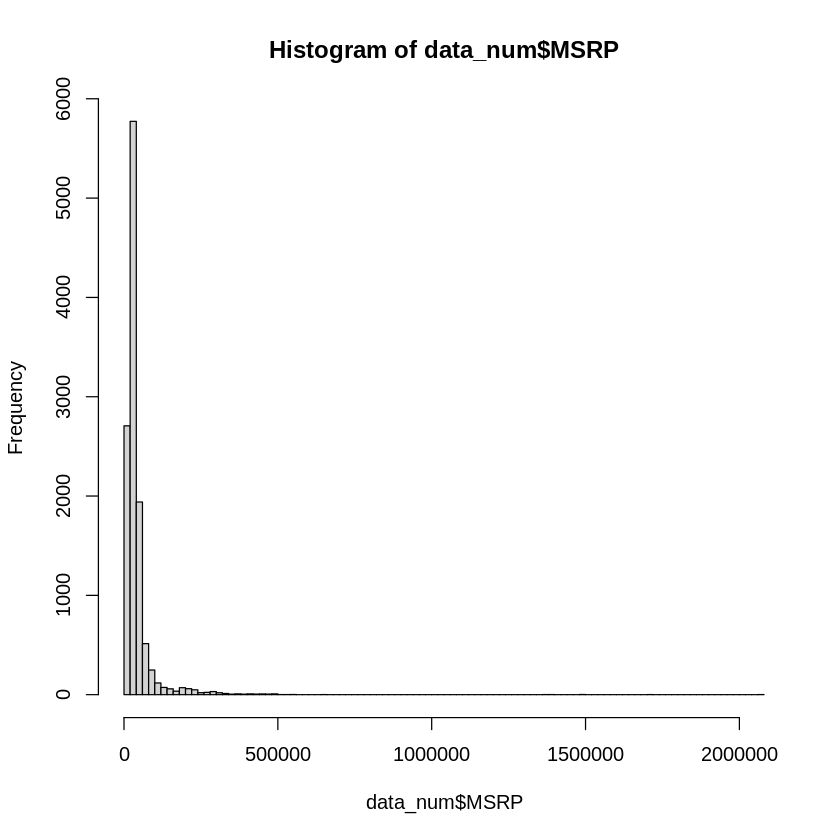

In [19]:
hist(data_num$MSRP, breaks = 100)

Comme vous pouvez le voir sur le graphique, notre variable MSRP est quasiment null au delà de 50000.

In [20]:
data_num <- data_num %>%
  filter(MSRP>15000) %>%
  filter(MSRP<50000)

In [21]:
set.seed(123)
size <- floor(0.8 * nrow(data_num))
train_ind <- sample(seq_len(nrow(data_num)), size = size)
train <- data_num[train_ind, ]
test <- data_num[-train_ind, ]

## Etape 4: Créer et ajuster notre model

In [22]:
model <- lm(MSRP ~ ., data = train)
summary(model)


Call:
lm(formula = MSRP ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-18468.7  -3769.3   -684.6   3423.8  20456.2 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -3.000e+05  3.978e+04  -7.541 5.32e-14 ***
Year              1.543e+02  1.989e+01   7.759 9.93e-15 ***
Engine.HP         1.118e+02  1.756e+00  63.659  < 2e-16 ***
Engine.Cylinders -1.201e+03  9.944e+01 -12.081  < 2e-16 ***
Number.of.Doors   2.526e+02  8.925e+01   2.830  0.00467 ** 
highway.MPG      -1.170e+02  2.905e+01  -4.028 5.68e-05 ***
city.mpg          1.634e+02  2.554e+01   6.398 1.69e-10 ***
Popularity       -2.246e-01  4.952e-02  -4.536 5.85e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5495 on 6384 degrees of freedom
Multiple R-squared:  0.5953,	Adjusted R-squared:  0.5949 
F-statistic:  1342 on 7 and 6384 DF,  p-value: < 2.2e-16


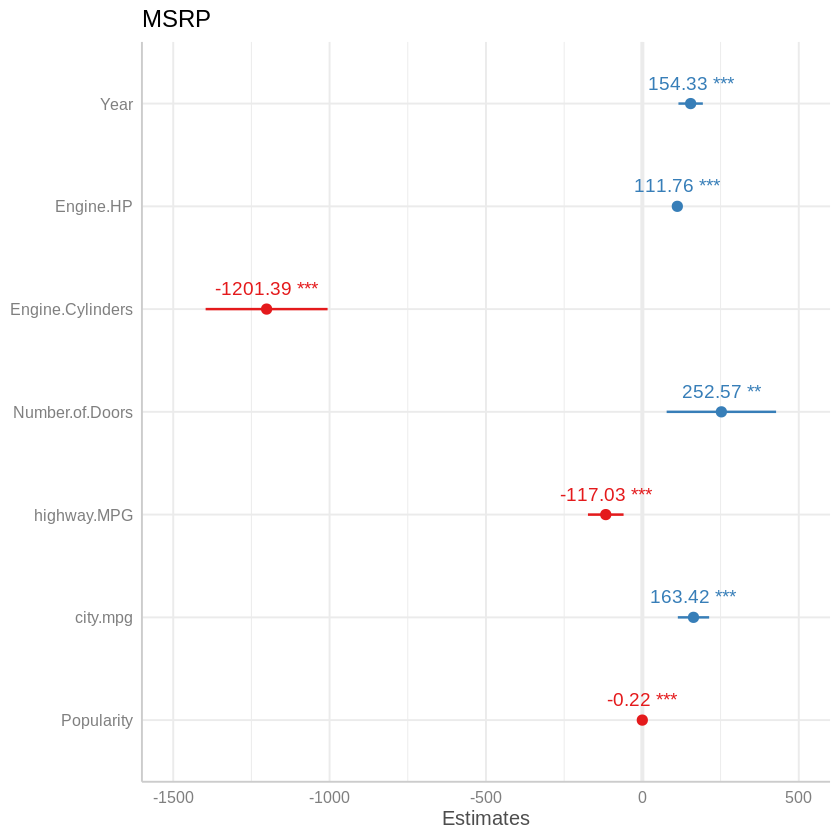

In [23]:
plot_model(model, show.values = TRUE, value.offset = 0.2)


Nous allons créer un deuxième model et voir lequel serait le plus performant

In [24]:
model2 <- lm(MSRP ~ Engine.HP + highway.MPG + Engine.Cylinders, data = train)
summary(model2)


Call:
lm(formula = MSRP ~ Engine.HP + highway.MPG + Engine.Cylinders, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-21578.0  -3827.0   -664.9   3602.7  19664.4 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       8715.582    728.970  11.956  < 2e-16 ***
Engine.HP          117.500      1.501  78.293  < 2e-16 ***
highway.MPG         79.800     14.233   5.607 2.15e-08 ***
Engine.Cylinders -1373.034     94.077 -14.595  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5546 on 6388 degrees of freedom
Multiple R-squared:  0.5876,	Adjusted R-squared:  0.5874 
F-statistic:  3034 on 3 and 6388 DF,  p-value: < 2.2e-16


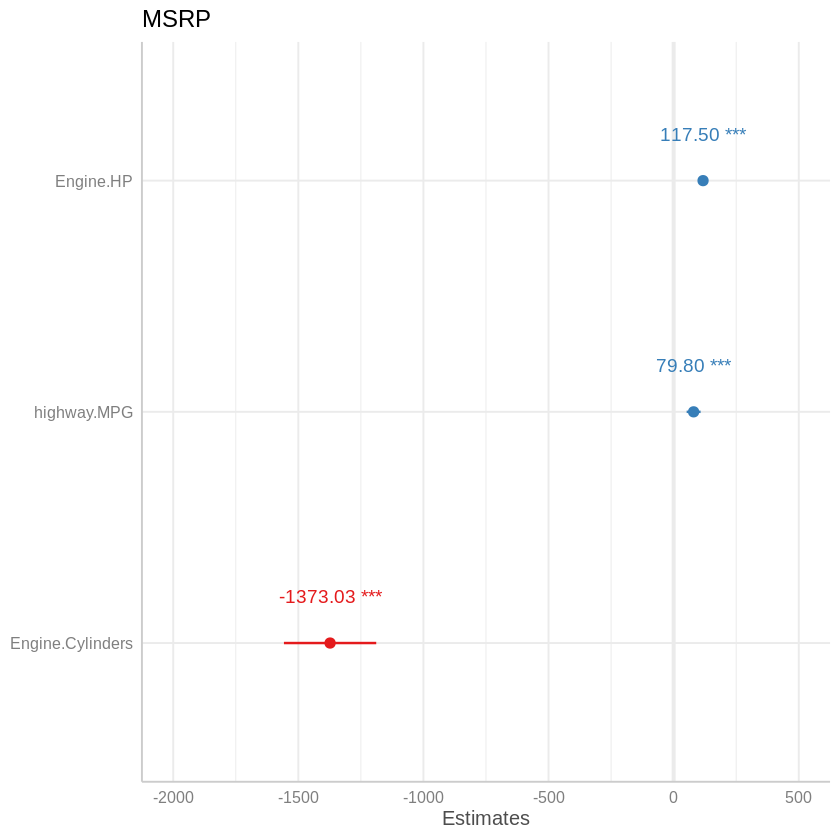

In [25]:
plot_model(model2, show.values = TRUE, value.offset = 0.2)


# Etape 5: Analyse visuelle des performances du modèle

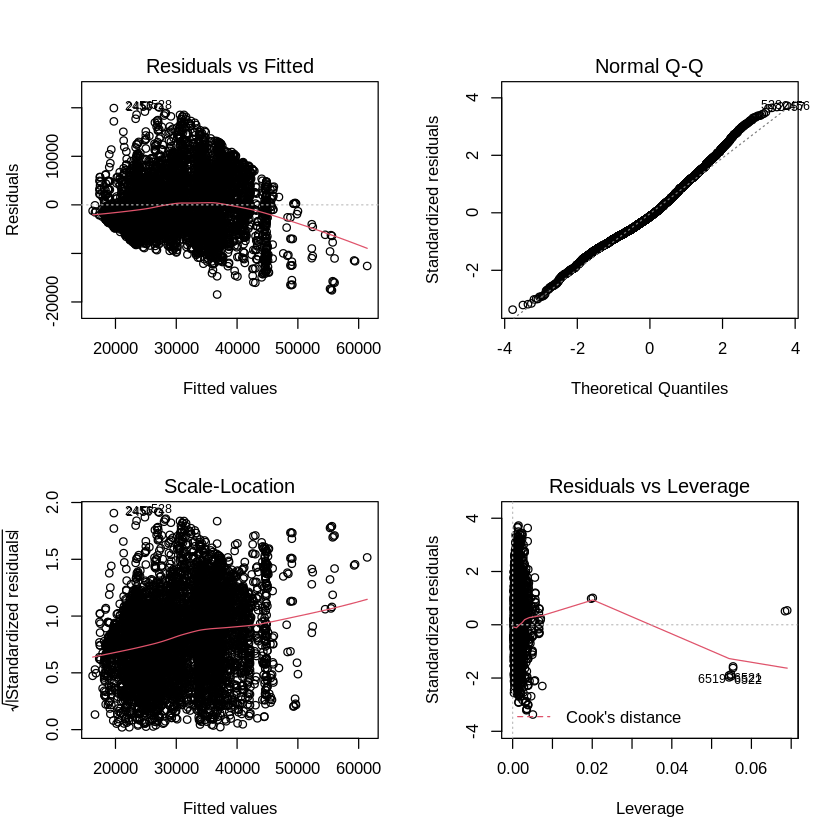

In [26]:
par(mfrow=c(2,2))
plot(model)

# Etape 6: Prédire les résultats avec notre model 1 qui est le plus performant

In [27]:
test$pred <- predict(model, newdata = test)

`geom_smooth()` using formula 'y ~ x'



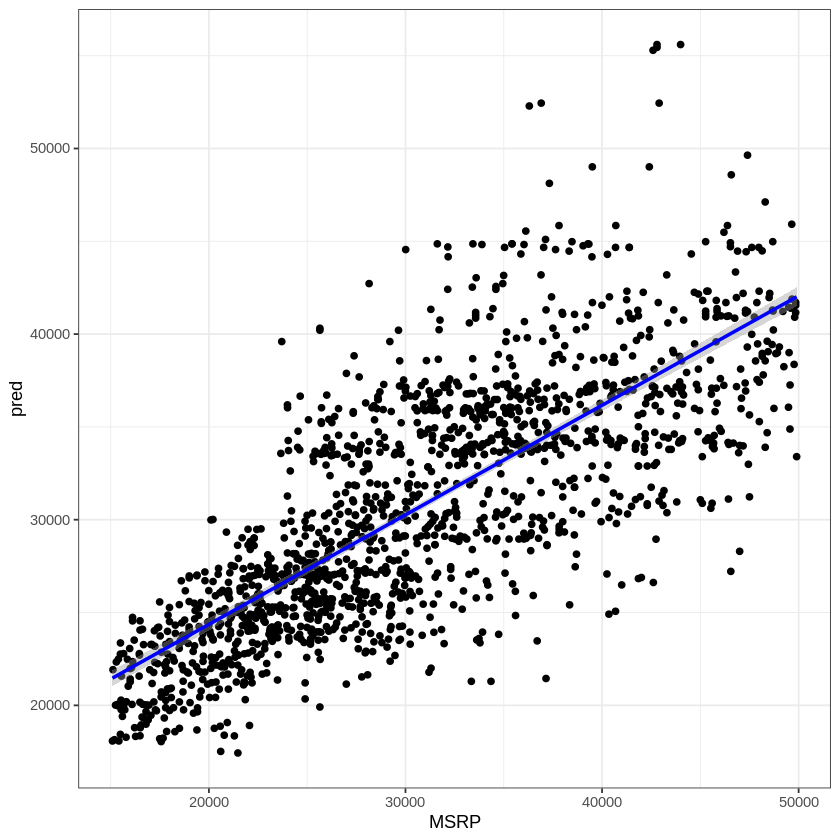

In [28]:
par(mfrow=c(1,1))
ggplot(test, aes(x=MSRP, y=pred)) +
  geom_point() + 
  geom_smooth(method="lm", color="blue") + 
  theme_bw()

In [30]:
error <- test$pred - test$MSRP
rmse <- sqrt(mean(error^2))
rmse

[1] 5546.37